In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
    
    def __init__(self,in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x
 

In [3]:
torch.manual_seed(32)
model = Model()

In [4]:
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data_iris = pd.read_csv('/media/reza/ResearchDrive/Courses/Course_PyTorch/PYTORCH_NOTEBOOKS/Data/iris.csv')

In [7]:
data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [15]:
from sklearn.model_selection import train_test_split
features = data_iris.drop('target',axis=1).values
label = data_iris['target'].values
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=33)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [16]:
criterian = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [34]:
epochs = 100

losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    
    loss = criterian(y_pred, y_train)
    losses.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    

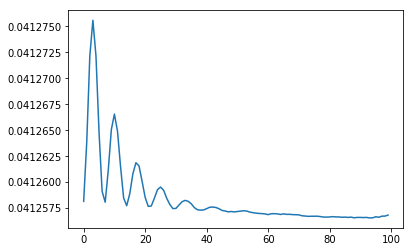

In [35]:
plt.plot(range(epochs), losses)

In [43]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterian(y_eval,y_test)
    

In [44]:
loss

tensor(0.0458)

In [40]:
y_test

tensor([1, 1, 0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0,
        2, 2, 1, 1, 2, 2])

In [42]:
y_eval.shape

torch.Size([30, 3])

In [46]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        
        if y_val.argmax().item() == y_test[i]:
            correct = correct+1

In [47]:
correct

30

In [49]:
torch.save(model.state_dict(),'iris_model.pt')